<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/CNN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import zipfile
import io

from google.colab import files

In [2]:
import pandas as pd

In [3]:
uploaded = files.upload()

Saving maskdata.zip to maskdata.zip


In [28]:
!pwd

/content


In [5]:
data = zipfile.ZipFile(io.BytesIO(uploaded['maskdata.zip']), 'r')
data.extractall()

In [6]:
train = '/content/maskdata/train'
test = '/content/PTest'


In [7]:
# Comenzamos a crear nuestra CNN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow.keras import backend as K

In [42]:
K.clear_session()

In [43]:
tf.keras.preprocessing.image.ImageDataGenerator # ImageDataGenerator
tf.keras.applications.mobilenet.preprocess_input
tf.keras.layers # Flatten, Dropout, Dese ^ Activation
tf.keras.layers # Convolution2D; MaxPooling2D
tf.keras.image
# importaremos esto

AttributeError: ignored

In [44]:
epochs = 20
longitud, altura = 350,350
batch_size = 32
filtrosConv1 = 32
filtrosCon2 = 64
sizeFiltro1 = (3,3)
sizeFiltro2 = (2,2)
sizePool = (2,2)
classes = 2
lr = 1e-2

In [45]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255, # Rescalamos range(0,1)
    shear_range = 0.3, # Corte a la imagen
    zoom_range=0.3, # zoom a la imagne
    horizontal_flip = True # voltear horizontalemnte
)

In [46]:
img_train = train_datagen.flow_from_directory(
    train,
    target_size=(altura, longitud),
    batch_size = batch_size,
    class_mode ='categorical'
)

Found 616 images belonging to 2 classes.


In [47]:
img_train.class_indices

{'with_mask': 0, 'without_mask': 1}

In [48]:
img_train.n
img_train.batch_size

32

In [49]:
cnn = tf.keras.Sequential()

# Preprocesing
cnn.add(tf.keras.layers.Convolution2D(filtrosConv1, sizeFiltro1, padding='same',
                                      input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=sizePool, strides=(2,2), padding='valid'))

cnn.add(tf.keras.layers.Convolution2D(filtrosCon2, sizeFiltro2, padding='same'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=sizePool, strides=(1,1), padding='valid'))

# Fully connectec layer
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(256, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
#cnn.add(tf.keras.layers.Dense(16, activation='relu'))
#cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Dense(classes, activation='tanh'))

ResourceExhaustedError: ignored

In [ ]:
train_step = img_train.n // img_train.batch_size
train_step

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history = cnn.fit_generator(img_train, steps_per_epoch=train_step, epochs=epochs)

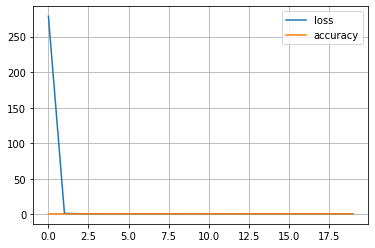

In [18]:
pd.DataFrame(history.history).plot()
plt.grid()
plt.show()

In [20]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
# ImageDataGenerator(preprocessing_function=preprocess_input) CODIGO DE ARRIBA
img_test = test_datagen.flow_from_directory(
    directory=test, 
    target_size=(altura, longitud),
    color_mode='rgb',
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 198 images belonging to 1 classes.


In [21]:
img_test.class_indices

{'prueba': 0}

In [22]:
step_size_test = img_test.n // img_test.batch_size
step_size_test

198

In [23]:
img_test.reset()
pred = cnn.predict_generator(img_test, steps=step_size_test, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


198/198 [==============================] - 2s 11ms/step


In [24]:
predicted_class = np.argmax(pred, axis=1)

predicted_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,
       0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,
       1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,
       1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,
       1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

len(vec)

198

In [28]:
np.mean(np.sum(np.equal(vec, predicted_class)))

66.0

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

report = classification_report(vec, predicted_class)
print(report)

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        66
           1       0.00      0.00      0.00       132

    accuracy                           0.33       198
   macro avg       0.17      0.50      0.25       198
weighted avg       0.11      0.33      0.17       198



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
accuracy_score(vec, predicted_class)

0.3333333333333333

In [34]:
del(cnn)